You are expected to perform a simple classification problem - that of labelling emails as spam or non-spam, based on their content in terms of words. The dataset has been taken from UCI Machine learning repository (https://archive.ics.uci.edu/ml/datasets/Spambase). This must be achieved using two machine learning models based on Decision Trees.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import dataset
df = pd.read_csv("spambase.data")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
X = df.iloc[:, :-1] # all attributes except last one
y = df.iloc[:, -1] # last column as target variable

# Doing train_test_split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Split the data considering the testing corpus as 30% and random state to 101.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
from sklearn import tree

In [7]:
model = tree.DecisionTreeClassifier()

In [8]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
model.score(X_train, y_train)

0.9996894409937889

# Checking accuracy of testing dataset

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
predictions_test=clf.predict(X_test)
print("DecisionTrees Test Accuracy: ",accuracy_score(y_test, predictions_test))

DecisionTrees Test Accuracy:  0.9202898550724637


# Checking accuracy of training dataset

In [14]:
predictions_train = clf.predict(X_train)
print("DecisionTrees Train Accuracy: ", accuracy_score(y_train,predictions_train))

DecisionTrees Train Accuracy:  0.9996894409937889


# Visualizing final decision tree

In [17]:
from sklearn import tree
plt.figure(figsize=(100,100))
tree.plot_tree(clf,filled=True)
plt.show()

# Evaluating dataset

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,predictions_test))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       822
           1       0.89      0.91      0.90       558

    accuracy                           0.92      1380
   macro avg       0.92      0.92      0.92      1380
weighted avg       0.92      0.92      0.92      1380



In [21]:
cm= confusion_matrix(y_test,predictions_test)
print(cm)

[[760  62]
 [ 48 510]]


Text(35.22222222222222, 0.5, 'Truth')

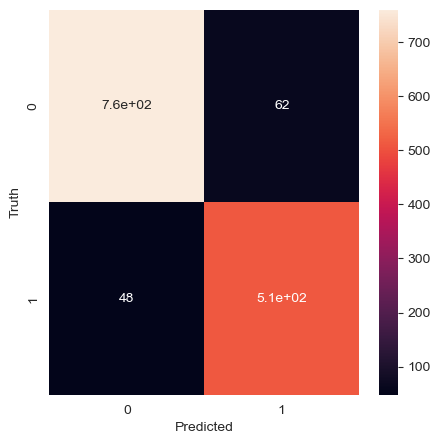

In [22]:
import seaborn as sn

plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")